# Case Study
Here, we are doing basic Modelling and then hypertuning of Models to find out the best Model for the Dataset.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration and Understanding

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# importing data
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [5]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [7]:
# droping null values
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [9]:
df.shape

(2219, 3)

In [10]:
# getting target values
df['y'].value_counts()/len(df)*100

0    55.790897
1    44.209103
Name: y, dtype: float64

Here Data is Imbalanced So we need to balanced the data

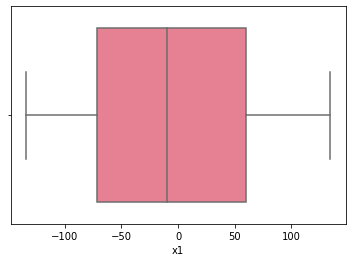

In [11]:
sns.boxplot(df['x1'], palette='husl')

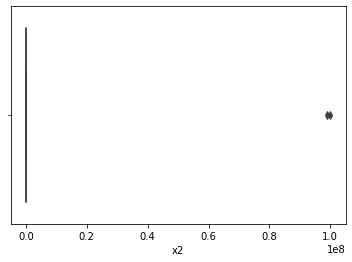

In [12]:
sns.boxplot(x=df['x2'])

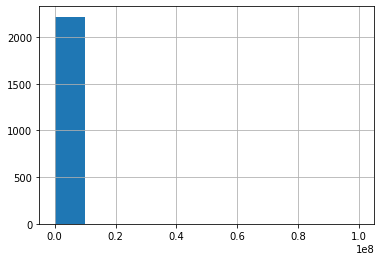

In [13]:
df.x2.hist()

In [14]:
# Removing Outliers
df = df.loc[df['x2']<= 10000000]

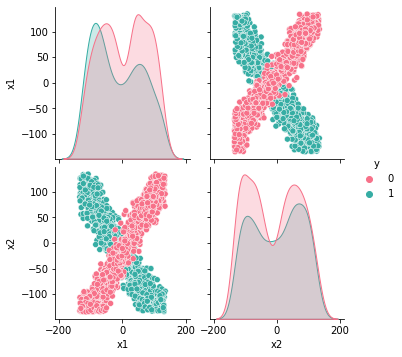

In [15]:
# Pairplot
sns.pairplot(data = df, hue='y', palette='husl')

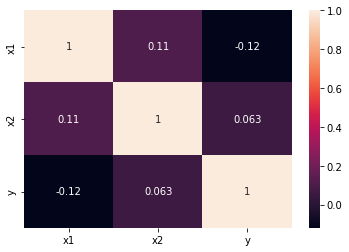

In [16]:
# Correlation using Heatmap
sns.heatmap(df.corr(), annot=True)

# Data Preparation

In [17]:
target = df.pop('y')
data = df

In [18]:
print(data.shape)
print(target.shape)

(2217, 2)
(2217,)


In [19]:
# Normalization of Data
from sklearn.preprocessing import MinMaxScaler
normalized_data = MinMaxScaler().fit_transform(data)
normalized_data.shape

(2217, 2)

In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(normalized_data, target, test_size = 0.2, random_state = 0)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1773, 2) (444, 2) (1773,) (444,)


In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
# Undersampling
rus = RandomUnderSampler( random_state =0)
rus.fit(X_train, y_train)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1574, 2) (444, 2) (1574,) (444,)


# Basic Modelling of Dataset

We are using basic Machine Learning Models without Hyperparameter Tuning

In [25]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
print('Logistic Regression score :',LR.score(X_test, y_test))

Logistic Regression score : 0.6193693693693694


In [26]:
# SVM with Linear Kernel
from sklearn.svm import LinearSVC
Linear_SVM = LinearSVC()
Linear_SVM.fit(X_train, y_train)
print('Linear SVM score :',Linear_SVM.score(X_test, y_test))

Linear SVM score : 0.6216216216216216


In [27]:
# SVM with RBF Kernel
from sklearn.svm import NuSVC
Nu_SVM = NuSVC()
Nu_SVM.fit(X_train, y_train)
print('SVM with RBF Kernel score :',Nu_SVM.score(X_test, y_test))

SVM with RBF Kernel score : 0.9617117117117117


In [28]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
print('Decision Tree Classifier score :',DTC.score(X_test, y_test))

Decision Tree Classifier score : 0.9391891891891891


In [29]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
print('Decision Tree Classifier score :',KNN.score(X_test, y_test))

Decision Tree Classifier score : 0.954954954954955


# Advance Modelling of Dataset

We have done hyperparameter tuning in each of the models for performance checking

In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
tuned_hyperparameters = [{'C': [0.001,0.01, 0.1, 1, 10, 100] ,'penalty':['l1','l2']}]

LR = GridSearchCV(LogisticRegression(), tuned_hyperparameters)
LR.fit(X_train, y_train)
print(LR.best_params_)
print(LR.best_estimator_)
print(LR.score(X_test, y_test))

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.6238738738738738


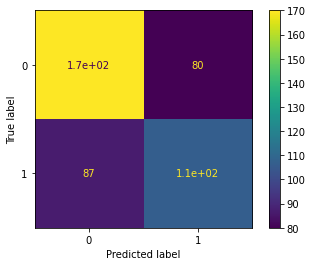

In [31]:
# Confusion Matrix
from sklearn import metrics
metrics.plot_confusion_matrix(LR, X_test, y_test)

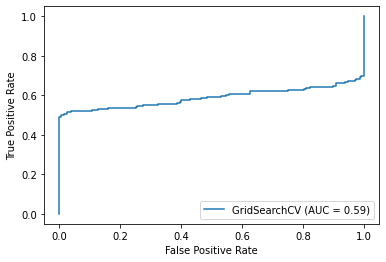

In [32]:
# ROC-AUC Curve
metrics.plot_roc_curve(LR, X_test, y_test)

In [33]:
# Precision, Recall and F1-score
y_pred = LR.predict(X_test)
target_names = ['class_0','class_1']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.66      0.68      0.67       250
     class_1       0.57      0.55      0.56       194

    accuracy                           0.62       444
   macro avg       0.62      0.62      0.62       444
weighted avg       0.62      0.62      0.62       444



In [34]:
# SVM with Linear and RBF kernel
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
tuned_parameters = [{'kernel':['linear'], 'C':[1, 10, 100, 1000]},
                    {'kernel':['rbf'], 'gamma':np.random.rand(3), 'C':[1, 10, 100, 1000]}]
SVM = RandomizedSearchCV(SVC(), tuned_parameters, scoring='accuracy')
SVM.fit(X_train, y_train)
print('Best Parameters in SVC are :\n')
print(SVM.best_estimator_)
print(SVM.best_params_)
print(SVM.score(X_test, y_test))

Best Parameters in SVC are :

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.414559075855808,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
{'kernel': 'rbf', 'gamma': 0.414559075855808, 'C': 1}
0.9594594594594594


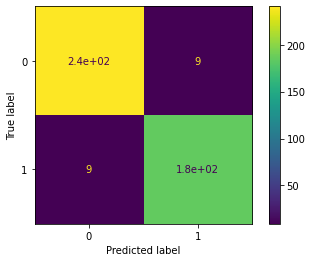

In [35]:
# Confusion Matrix
metrics.plot_confusion_matrix(SVM, X_test, y_test)

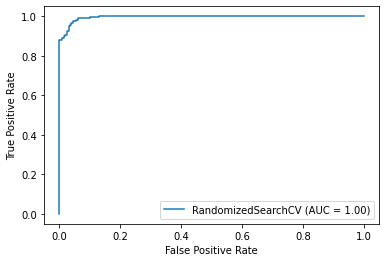

In [36]:
# ROC-AUC Curve
metrics.plot_roc_curve(SVM, X_test, y_test)

In [37]:
# Precision, Recall and F1-score
y_pred = SVM.predict(X_test)
target_names = ['class_0','class_1']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.96      0.96      0.96       250
     class_1       0.95      0.95      0.95       194

    accuracy                           0.96       444
   macro avg       0.96      0.96      0.96       444
weighted avg       0.96      0.96      0.96       444



In [38]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tuned_parameters = [{ 'criterion' :['gini', 'entropy'], 'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]
DTC = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv = 5)
DTC.fit(X_train, y_train)
print('Best Parameters for Decision Tree Classifier :\n')
print(DTC.best_params_)
print(DTC.best_estimator_)
print(DTC.score(X_test, y_test))

Best Parameters for Decision Tree Classifier :

{'criterion': 'entropy', 'max_depth': 30}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.9436936936936937


In [39]:
print('Best Parameters for Decision Tree Classifier :\n')
print(DTC.best_params_)
print(DTC.best_estimator_)
print(DTC.score(X_test, y_test))

Best Parameters for Decision Tree Classifier :

{'criterion': 'entropy', 'max_depth': 30}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.9436936936936937


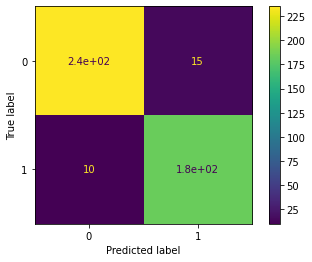

In [40]:
# Confusion Matrix
metrics.plot_confusion_matrix(DTC, X_test, y_test)

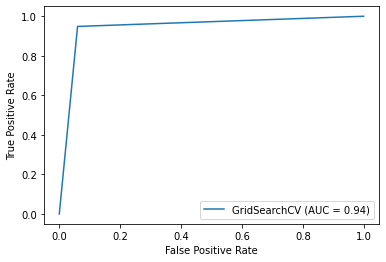

In [41]:
# ROC-AUC Curve
metrics.plot_roc_curve(DTC, X_test, y_test)

In [42]:
# Precision, Recall and F1-score
y_pred = DTC.predict(X_test)
target_names = ['class_0','class_1']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.96      0.94      0.95       250
     class_1       0.92      0.95      0.94       194

    accuracy                           0.94       444
   macro avg       0.94      0.94      0.94       444
weighted avg       0.94      0.94      0.94       444



In [43]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
tuned_parameters = [{'n_neighbors':[5,7,9,13,17], 'p':[1,2,3,4]}]

KNeighbors = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='accuracy')
KNeighbors.fit(X_train, y_train)
print(KNeighbors.best_params_)
print(KNeighbors.best_estimator_)
print(KNeighbors.score(X_test, y_test))

{'n_neighbors': 17, 'p': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=1,
                     weights='uniform')
0.9662162162162162


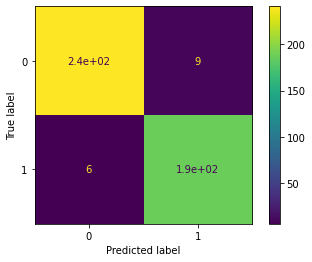

In [44]:
# Confusion Matrix
metrics.plot_confusion_matrix(KNeighbors, X_test, y_test)

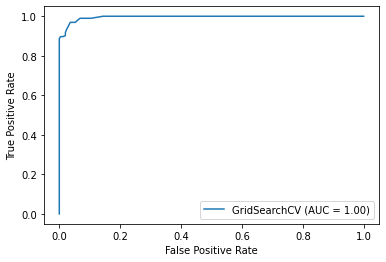

In [45]:
# ROC-AUC Curve
metrics.plot_roc_curve(KNeighbors, X_test, y_test)

In [46]:
# Precision, Recall and F1-score
y_pred = KNeighbors.predict(X_test)
target_names = ['class_0','class_1']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.98      0.96      0.97       250
     class_1       0.95      0.97      0.96       194

    accuracy                           0.97       444
   macro avg       0.97      0.97      0.97       444
weighted avg       0.97      0.97      0.97       444



We have done hyperparameter tuning of different Models.

In [62]:
Alg_list = [LR, SVM, DTC, KNeighbors]
Models = [x.best_estimator_ for x in Alg_list]
Accuracy_Score = [x.score(X_test, y_test) for x in Models]
F1_score = [metrics.f1_score(y_test, x.predict(X_test))  for x in Alg_list]

In [65]:
temp_df = pd.DataFrame({'Models': Models, 'Accuracy Score':Accuracy_Score, 'F1-score': F1_score})

temp_df.head()

,Models,Accuracy Score,F1-score
0,"LogisticRegression(C=0.01, class_weight=None, ...",0.623874,0.561680
1,"SVC(C=1, break_ties=False, cache_size=200, cla...",0.959459,0.953608
2,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.943694,0.936387
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.966216,0.961637


From here, we can see Decision Tree Classifier has best Accuracy and F1 score. So the best Model for this Data will be KNN Classifier having 0.96 accuracy and 0.96 F1 score